#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

### Model 8

Model will evaluate impact on Sale Price of:
- Total sqft House (feature engineering)
- Land area
- Condition
- Quality
- Interaction of Condition/Quality (feature engineering)
- Total # of Bathrooms (feature engineering)
- Bedrooms (proxy Above-Ground Bedrooms)
- Price per Sqft (feature engineering)
- Zone (dummy)
- Building Type (dummy)

### Feature Engineering

**Zone (dummy)**

In [66]:
%store -r df_no_na
%store -r joined_df
enc = OneHotEncoder()
cols = ["MS Zoning"]
column_name = []
for col in cols:
    column_name += [f"{col[0]}_{cat}" for cat in list(df_no_na[col].unique())]
column_name

enc_data_prep = enc.fit_transform(df_no_na[['MS Zoning']]).toarray()
enc_data_zone = pd.DataFrame(enc_data_prep, columns=column_name)
joined_df_1 = joined_df.join(enc_data_zone)

In [67]:
#repeat for test data
%store -r df_test_no_na
%store -r joined_test_df

cols_test = ["MS Zoning"]
column_name_test = []
for col in cols_test:
    column_name_test += [f"{col[0]}_{cat}" for cat in list(df_test_no_na[col].unique())]
column_name_test

enc_data_prep_test = enc.fit_transform(df_test_no_na[['MS Zoning']]).toarray()
enc_data_zone_test = pd.DataFrame(enc_data_prep_test, columns=column_name_test)
joined_df_1_test = joined_test_df.join(enc_data_zone_test)

**Building Type (dummy)**

In [68]:
cols = ["Bldg Type"]
column_name = []
for col in cols:
    column_name += [f"{col[0]}_{cat}" for cat in list(df_no_na[col].unique())]
column_name

enc_data_prep = enc.fit_transform(df_no_na[['Bldg Type']]).toarray()
enc_data_type = pd.DataFrame(enc_data_prep, columns=column_name)
joined_df_2 = joined_df_1.join(enc_data_type)

In [69]:
#repeat for test data
cols_test = ["Bldg Type"]
column_name_test = []
for col in cols_test:
    column_name_test += [f"{col[0]}_{cat}" for cat in list(df_test_no_na[col].unique())]
column_name_test

enc_data_prep_test = enc.fit_transform(df_test_no_na[['Bldg Type']]).toarray()
enc_data_type_test = pd.DataFrame(enc_data_prep_test, columns=column_name_test)
joined_df_2_test = joined_df_1_test.join(enc_data_type_test)

In [70]:
df_no_na_model8 = joined_df_2[["Overall Cond", 
                         "Overall Qual", 
                         "Qual_cond", 
                         "Bathrooms", 
                         "Bedroom AbvGr", 
                         "Total_SF",
                        "Lot Area",
                         "SalePrice",
                        "Price_per_SF", 
                        'M_C (all)', 
                        'M_A (agr)',
                        'M_RH',
                        'M_I (all)',
                        'B_1Fam', 
                        'B_TwnhsE',
                        'B_Twnhs', 
                        'B_2fmCon', 
                        'B_Duplex'
                            ]]

In [100]:
df_test_no_na_model8 = joined_df_2_test[["Overall Cond", 
                         "Overall Qual", 
                         "Qual_cond", 
                         "Bathrooms", 
                         "Bedroom AbvGr", 
                         "Total_SF",
                        "Lot Area",
                        "Price_per_SF", 
                        'M_C (all)', 
                        'M_RH',
                        'M_I (all)',
                        'M_RM',
                        'M_RL',
                        'M_FV',
                        'B_1Fam', 
                        'B_TwnhsE',
                        'B_Twnhs', 
                        'B_2fmCon', 
                        'B_Duplex'
                            ]]

**Lot area (log transform)**

In [71]:
df_no_na_model8["Transform_Lot_Area"] = np.log10(df_no_na_model8["Lot Area"])

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_71533/715669402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na_model8["Transform_Lot_Area"] = np.log10(df_no_na_model8["Lot Area"])


In [102]:
df_test_no_na_model8["Transform_Lot_Area"] = np.log10(df_test_no_na_model8["Lot Area"])

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_71533/613381892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_no_na_model8["Transform_Lot_Area"] = np.log10(df_test_no_na_model8["Lot Area"])


**NAs are removed post transformation**

In [73]:
df_no_na_model8.dropna(how = "any", inplace = True)

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_71533/4150272402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na_model8.dropna(how = "any", inplace = True)


In [103]:
df_test_no_na_model8.dropna(how = "any", inplace = True)

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_71533/1453309754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_no_na_model8.dropna(how = "any", inplace = True)


**Reconciling columns to align shape post encoding**

In [75]:
df_no_na_model8["M_RM"]=0

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_71533/1351013016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na_model8["M_RM"]=0


In [76]:
df_no_na_model8["M_RL"]=0

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_71533/2556475133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na_model8["M_RL"]=0


In [77]:
df_no_na_model8["M_FV"]=0

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_71533/804822520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na_model8["M_FV"]=0


In [104]:
df_test_no_na_model8["M_A (agr)"]=0

/var/folders/r7/lck4_m6n3qvgvrpymc_hdq900000gn/T/ipykernel_71533/2480970645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_no_na_model8["M_A (agr)"]=0


### Model - Lasso

In [79]:
#Remove M_I (all), B_Duplex to prevent multicollinearity
X8 = df_no_na_model8[["Overall Cond", 
                         "Overall Qual", 
                         "Qual_cond", 
                         "Bathrooms", 
                         "Bedroom AbvGr", 
                         "Total_SF",
                        "Transform_Lot_Area",
                           "Price_per_SF",
                        'M_C (all)', 
                        'M_A (agr)',
                        'M_RH',
                        'M_RM',
                        'M_RL',
                        'M_FV',
                        'B_1Fam', 
                        'B_TwnhsE',
                        'B_Twnhs', 
                        'B_2fmCon',]]
y8 = df_no_na_model8["SalePrice"]

In [105]:
X8_to_test = df_test_no_na_model8[["Overall Cond", 
                         "Overall Qual", 
                         "Qual_cond", 
                         "Bathrooms", 
                         "Bedroom AbvGr", 
                         "Total_SF",
                        "Transform_Lot_Area",
                           "Price_per_SF",
                        'M_C (all)', 
                        'M_A (agr)',
                        'M_RH',
                        'M_RM',
                        'M_RL',
                        'M_FV',
                        'B_1Fam', 
                        'B_TwnhsE',
                        'B_Twnhs', 
                        'B_2fmCon',]]

In [81]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, random_state=42)

In [82]:
ss = StandardScaler()
#ss.fit(X_train)
X8_train = ss.fit_transform(X8_train)
X8_test = ss.transform(X8_test)

In [85]:
lasso_8 = Lasso(alpha=1)
lasso_8.fit(X8_train, y8_train)

Lasso(alpha=1)

In [86]:
print('R2 training data', round(lasso_8.score(X8_train, y8_train), 2))
print('R2 test data', round(lasso_8.score(X8_test, y8_test), 2))

R2 training data 0.82
R2 test data 0.84


In [87]:
pred_train8 = lasso_8.predict(X8_train)
mse_train8 = mean_squared_error(y8_train, pred_train8)
print('RMSE training data', round(mse_train8**0.5, 2))

# Test data
pred8 = lasso_8.predict(X8_test)
mse_test8 = mean_squared_error(y8_test, pred8)
print('RMSE test data', round(mse_test8**0.5, 2))

RMSE training data 33381.92
RMSE test data 30758.35


In [107]:
%store -r df_test
submission8 = pd.DataFrame(df_test, columns=["Id"])
submission8["SalePrice"] = lasso_8_best.predict(X8_for_test)

In [108]:
submission8.to_csv('./datasets/submission8.csv', index=False)

### Model Validation

In [88]:
model_lasso_8 = LassoCV(cv=8, random_state=0, max_iter=10000)
model_lasso_8.fit(X8_train, y8_train)

LassoCV(cv=8, max_iter=10000, random_state=0)

In [89]:
lasso_8_best = Lasso(alpha=model_lasso_8.alpha_)
lasso_8_best.fit(X8_train, y8_train)

Lasso(alpha=518.5567735938163)

In [90]:
print('R2 training data', round(lasso_8_best.score(X8_train, y8_train), 2))
print('R2 test data', round(lasso_8_best.score(X8_test, y8_test), 2))
pred_train8_best = lasso_8_best.predict(X8_train)
mse_train8_best = mean_squared_error(y8_train, pred_train8_best)
print('RMSE training data', round(mse_train8_best**0.5, 2))

# Test data
pred8_best = lasso_8_best.predict(X8_test)
mse_test8_best = mean_squared_error(y8_test, pred8_best)
print('RMSE test data', round(mse_test8_best**0.5, 2))

R2 training data 0.82
R2 test data 0.84
RMSE training data 33453.91
RMSE test data 30800.23


In [106]:
X8_for_test = ss.transform(X8_to_test)

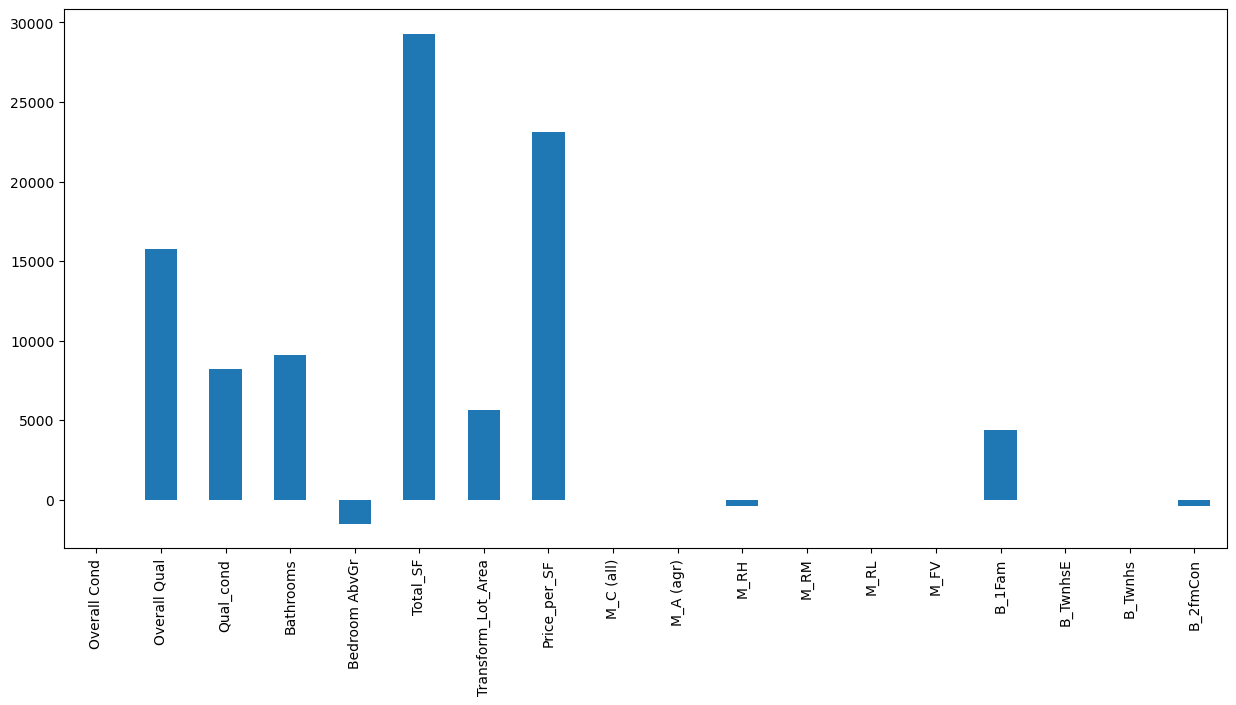

In [92]:
pd.Series(lasso_8_best.coef_, index=("Overall Cond", 
                         "Overall Qual", 
                         "Qual_cond", 
                         "Bathrooms", 
                         "Bedroom AbvGr", 
                         "Total_SF",
                        "Transform_Lot_Area",
                           "Price_per_SF",
                        'M_C (all)', 
                        'M_A (agr)',
                        'M_RH',
                        'M_RM',
                        'M_RL',
                        'M_FV',
                        'B_1Fam', 
                        'B_TwnhsE',
                        'B_Twnhs', 
                        'B_2fmCon')).plot.bar(figsize = (15, 7));


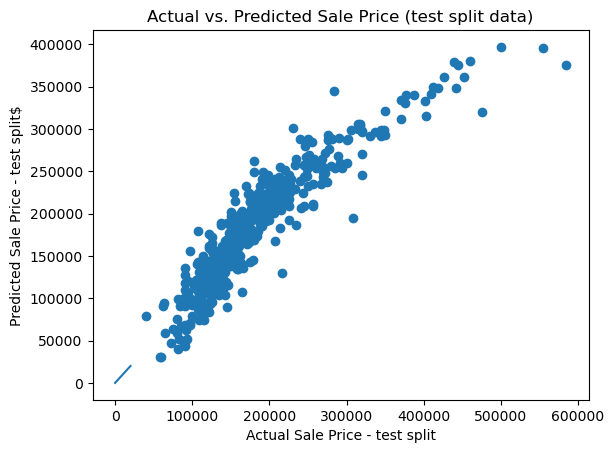

In [109]:
plt.scatter(y8_test, pred8_best)
plt.plot(range(20000), range(20000))

plt.xlabel("Actual Sale Price - test split")
plt.ylabel("Predicted Sale Price - test split$")
plt.title("Actual vs. Predicted Sale Price (test split data)")

plt.show()